# YouTube Video Transcript Summarization with Hugging Face Transformers
Author: Claudia Magliano

Date: 11/07/2024

In [1]:
!pip install -q transformers
!pip install -q youtube_transcript_api

In [2]:
from transformers import pipeline
from youtube_transcript_api import YouTubeTranscriptApi

In [3]:
youtube_video = 'https://www.youtube.com/watch?v=UF8uR6Z6KLc'

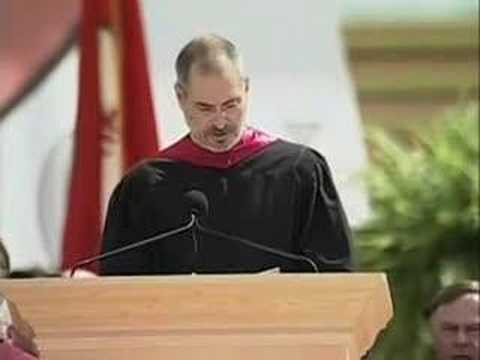

In [4]:
video_id = youtube_video.split("=")[1]
from IPython.display import YouTubeVideo
YouTubeVideo(video_id)

In [6]:
transcript= YouTubeTranscriptApi.get_transcript(video_id)
#Transcript is a Json object and we need to extrat text
transcript[0:5]

[{'text': 'This program is brought to you by Stanford University.',
  'start': 7.47,
  'duration': 2.899},
 {'text': 'Please visit us at stanford.edu',
  'start': 10.47,
  'duration': 3.973},
 {'text': 'Thank You. I am honored to be with you today at your commencement',
  'start': 22.492,
  'duration': 7.527},
 {'text': 'from one of the finest universities in the world.',
  'start': 30.02,
  'duration': 2.718},
 {'text': 'Truth be told I never graduated from college',
  'start': 35.559,
  'duration': 6.0}]

In [7]:
result = " "
for i in transcript:
  result +=" " + i["text"]
print(len(result))

12133


In [8]:
summarizer = pipeline('summarization')

No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 and revision a4f8f3e (https://huggingface.co/sshleifer/distilbart-cnn-12-6).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access pu

config.json:   0%|          | 0.00/1.80k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

# Chuncking the Text
Because you text is too long we have to chunck it in small peaces to summarize it.

In [11]:
num_iters = int(len(result)/1000)
summarized_text = []
for i in range(0,num_iters + 1):
  start = 0
  start= i * 1000
  end= (i+1)* 1000
  out=summarizer(result[start:end])
  out= out[0]
  out= out["summary_text"]
  summarized_text.append(out)


Your max_length is set to 142, but your input_length is only 31. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=15)


In [14]:
str(summarized_text)

'[\' I dropped out of Reed College after the first 6 months, but then stayed around as a drop-in for another 18 months or so before I really quit . My biological mother was a young, unwed graduate student, and she decided to put me up for adoption . She felt very strongly that I should be adopted by college graduates .\', " My biological mother found out that my mother had never graduated from college and that my father had never . She refused to sign the final adoption papers . She only relented when my parents promised that I would go to college . But I naively chose a college that was almost as expensive as Stanford . After six months, I couldn\'t see the value in it .", " The minute I dropped out I could stop taking required classes that didn\'t interest me, and begin dropping in on the ones that looked interesting . Reed College at that time offered perhaps the best calligraphy instruction in the country. Throughout the campus every poster, every label on every drawer, was beautif

In [15]:
#Number of words
len(str(summarized_text))

4346